# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Base para previsão de renda, o objetivo é construir um modelo que preveja a renda de um individuo
a partir dos dados da base


## Etapa 2 Crisp-DM: Entendimento dos dados

Temos 14 variaveis na base de dados,cada linha contem a informação um individuo.
a variavel renda é nossa variavel resposta.


### Dicionário de dados



| Variável                | Descrição                                                   | Tipo         |
| ----------------------- |:-----------------------------------------------------------:| ------------:|
| data_ref                |  data de referencia                                         | Data         |
| id_cliente              |  Id unico de cada individuo                                 | INT          |
| sexo                    |  M = 'Masculino'; F = 'Feminino'                            | M/F       
| posse_de_veiculo        |  Y = 'possui'; N = 'não possui'                             | Y/N          |
| posse_de_imovel         |  Y = 'possui'; N = 'não possui'                             | Y/N          |
| qtd_filhos              |  Quantidade de filhos                                       | INT          |
| tipo_renda              |  Tipo de renda (ex: assaliariado, autônomo etc)             | OBJECT                       
| educacao                |  Nível de educação (ex: secundário, superior etc)           | OBJECT
| estado_civil            |  Estado civil (ex: solteiro, casado etc)                    | OBJECT       |
| tipo_residencia         |  tipo de residência (ex: casa/apartamento, com os pais etc)	| OBJECT                               
| idade                   |  idade em anos                                              | INT          |
| tempo_emprego           |  tempo de emprego em anos                                   | INT          |
| qt_pessoas_residencia   |  quantidade de pessoas na residência                        | INT          |
| renda                   |  Indicador de renda                                         | INT          |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from ydata_profiling import ProfileReport
%matplotlib inline   

D:\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
D:\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/analise_base.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
fig=10,8

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

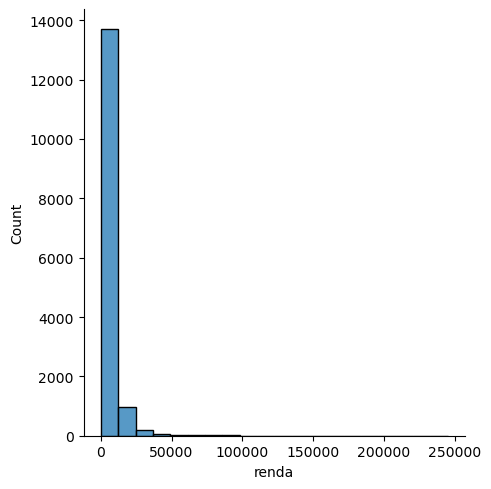

In [7]:
plt.clf()
plt.figure(figsize=(fig))
var = 'renda'
sns.displot(renda, x=var, bins = 20);

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

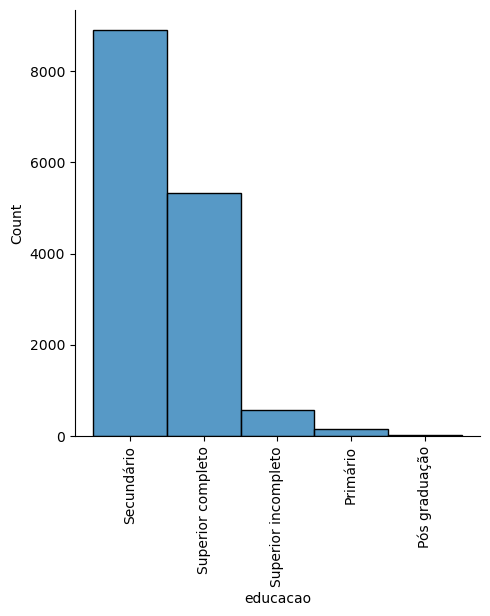

In [8]:
plt.clf()
plt.figure(figsize=(fig))
var = 'educacao'
sns.displot(renda, x=var, bins = 20);
plt.xticks(rotation=90);

<Figure size 640x480 with 0 Axes>

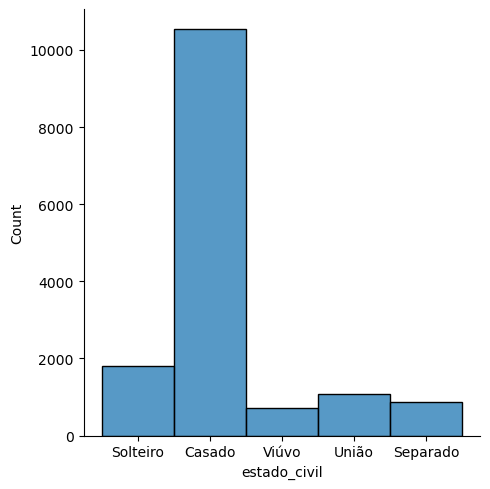

In [9]:
plt.clf()
var = 'estado_civil'
sns.displot(renda, x=var, bins = 20);

<Figure size 640x480 with 0 Axes>

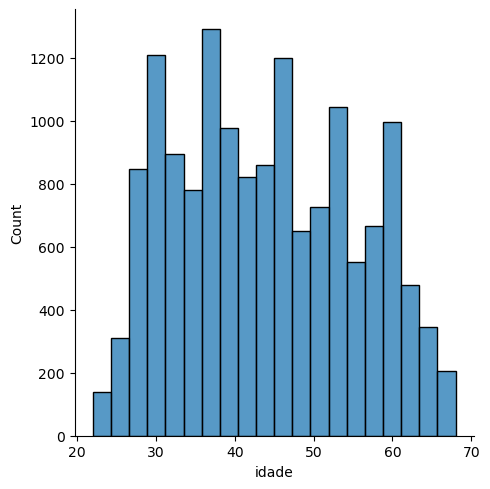

In [10]:
plt.clf()
var = 'idade'
sns.displot(renda, x=var, bins = 20);

## Entendimento dos dados - Bivariadas




#### Entender a renda do individuo explicada pela variavel resposta 'renda'


C:\Users\lukas\AppData\Local\Temp\ipykernel_14944\1490149388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(renda.corr());


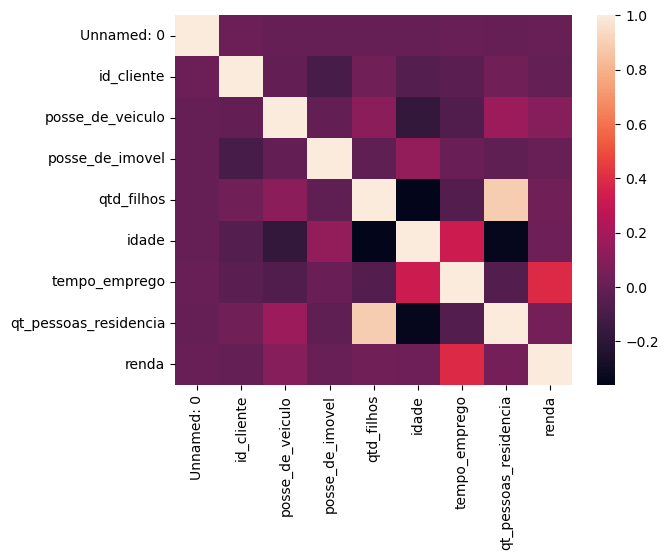

In [11]:
sns.heatmap(renda.corr());

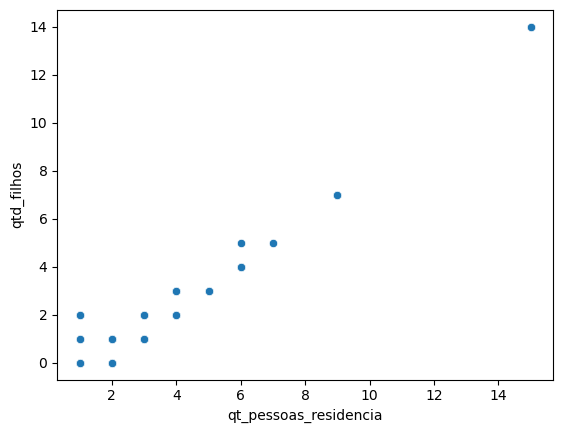

In [12]:
plt.clf()
var = 'qt_pessoas_residencia'
var2 = 'qtd_filhos'
sns.scatterplot(renda, x=var, y=var2);

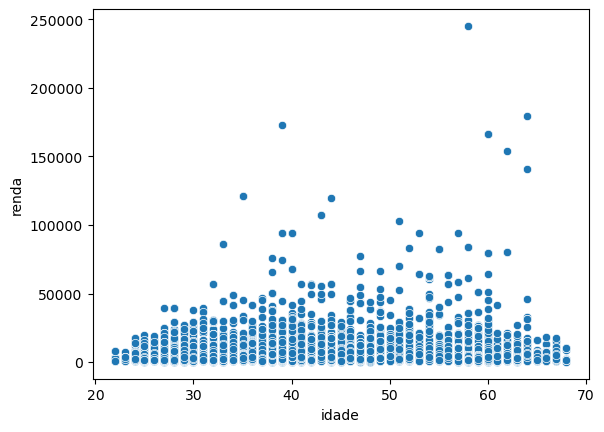

In [13]:
plt.clf()
var = 'idade'
var2 = 'renda'
sns.scatterplot(renda, x=var, y=var2);

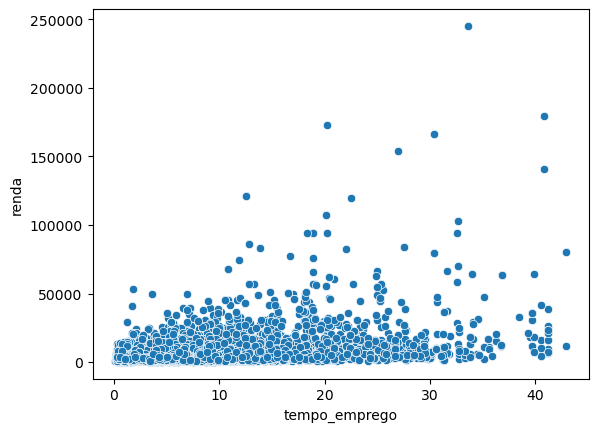

In [14]:
plt.clf()
var = 'tempo_emprego'
var2 = 'renda'
sns.scatterplot(renda, x=var, y=var2);

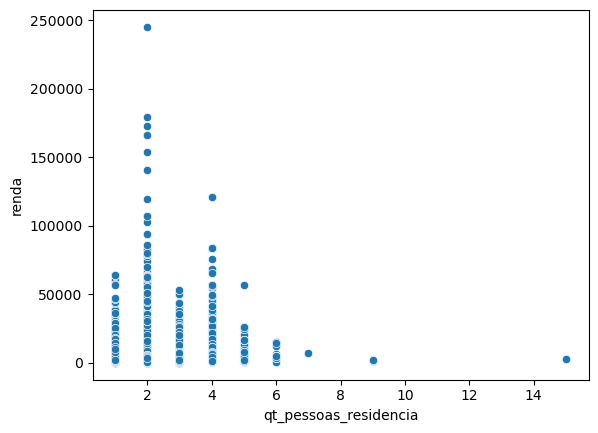

In [15]:
plt.clf()
var = 'qt_pessoas_residencia'
var2 = 'renda'
sns.scatterplot(renda, x=var, y=var2);

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [16]:
renda.drop(['Unnamed: 0','data_ref', 'id_cliente'],inplace=True, axis=1)

In [17]:
renda.isna().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [18]:
renda.shape

(15000, 12)

In [19]:
#porcentagem de NaN
renda['tempo_emprego'].isna().sum() / len(renda)

0.17153333333333334

In [20]:
#preenche os NaN com a media da variavel tempo_emprego
media = renda['tempo_emprego'].mean()
renda['tempo_emprego'].fillna(media, inplace=True)

renda.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [21]:
renda.head(1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [22]:
metadata = pd.DataFrame(renda.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(renda.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,int64,47
tempo_emprego,float64,2590


In [23]:
#transforma as variaveis categoricas em dummys

colunas_categoricas = renda.select_dtypes(include=['object', 'category']).columns.tolist()
renda_d = pd.get_dummies(renda, columns=colunas_categoricas, drop_first=True)


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [24]:
renda_d.head(1)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.60274,1.0,8060.34,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
X = renda_d.drop('renda', axis=1)
y = renda_d['renda']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1993)

regressao = RandomForestRegressor(max_depth=15,random_state=1993)
regressao.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=1993)

In [28]:
y_pred = regressao.predict(X_test)
y_train_pred = regressao.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'MSE: {mse}')
print(f'R2 score teste: {r2}')
print(f'R2 score treino: {r2_train}')

MSE: 42789428.69164454
R2 score teste: 0.47424284813739903
R2 score treino: 0.7724748786066087


## Etapa 5 Crisp-DM: Avaliação dos resultados


Com base no R2 o modelo está prevendo corretamente 47,4% na base de teste
e 77,2% na base de treino

In [29]:
data = {'Preditos': y_pred, 'Reais': y_test}
df_pred = pd.DataFrame(data)
df_pred.sample(10)

,Preditos,Reais
11576,2668.887086,2977.07
6394,5282.206512,666.80
4568,4898.033462,2809.64
2948,2004.932201,8641.60
7977,2102.678583,1613.06
8338,83634.953000,6434.05
5622,6087.821054,12283.63
9090,6112.111041,1223.98
11703,8850.728004,3406.70
12436,27555.996575,57039.28


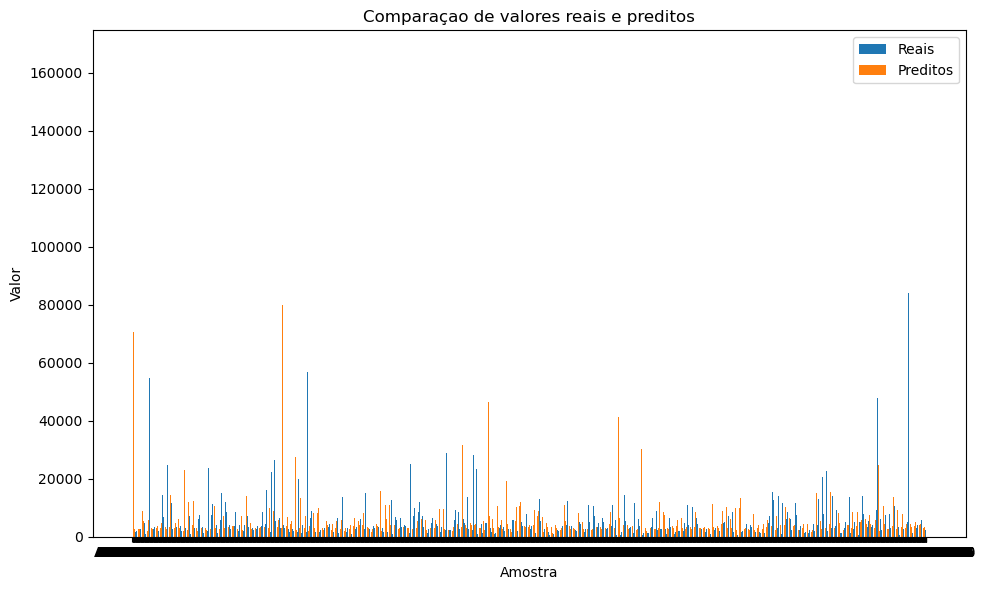

In [30]:

indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.bar(indices, y_test, width=0.4, label='Reais')
plt.bar(indices + 0.4, y_pred, width=0.4, label='Preditos')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Comparaçao de valores reais e preditos')
plt.xticks(indices + 0.2, [f'Amostra {i+1}' for i in range(len(y_test))])
plt.legend()
plt.tight_layout()
plt.show()

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [42]:
# Funçao para transformar os dados e fazer a previsao
def dummy_transformation(dados):
    # Crie um DataFrame com os dados de entrada
    novos_dados = pd.DataFrame([dados])
    
    colunas_categoricas = renda.select_dtypes(include=['object', 'category']).columns.tolist()
    novos_dados_dummy = pd.get_dummies(novos_dados, columns=colunas_categoricas, drop_first=True)
    
     #coloca as colunas na mesma ordem das colunas do treinamento
    novos_dados_dummy = novos_dados_dummy.reindex(columns=X.columns, fill_value=0)
    
    previsao_renda = regressao.predict(novos_dados_dummy)
    
    return previsao_renda[0]


In [43]:
novos_dados = {
    'sexo': 'F',
    'posse_de_veiculo': False,
    'posse_de_imovel': True,
    'qtd_filhos': 5,
    'tipo_renda': 'Empresário',
    'educacao': 'Secundário',
    'estado_civil': 'Solteiro',
    'tipo_residencia': 'Casa',
    'idade': 26,
    'tempo_emprego': 10,
    'qt_pessoas_residencia': 1.0
}

In [44]:
previsao = dummy_transformation(novos_dados)
print(f'Previsão de renda: R$ {previsao:.2f}')

Previsão de renda: R$ 5050.95
